Задача 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Diabetes Binary Classification.csv')
data.head()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable (0 or 1)
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

<Axes: >

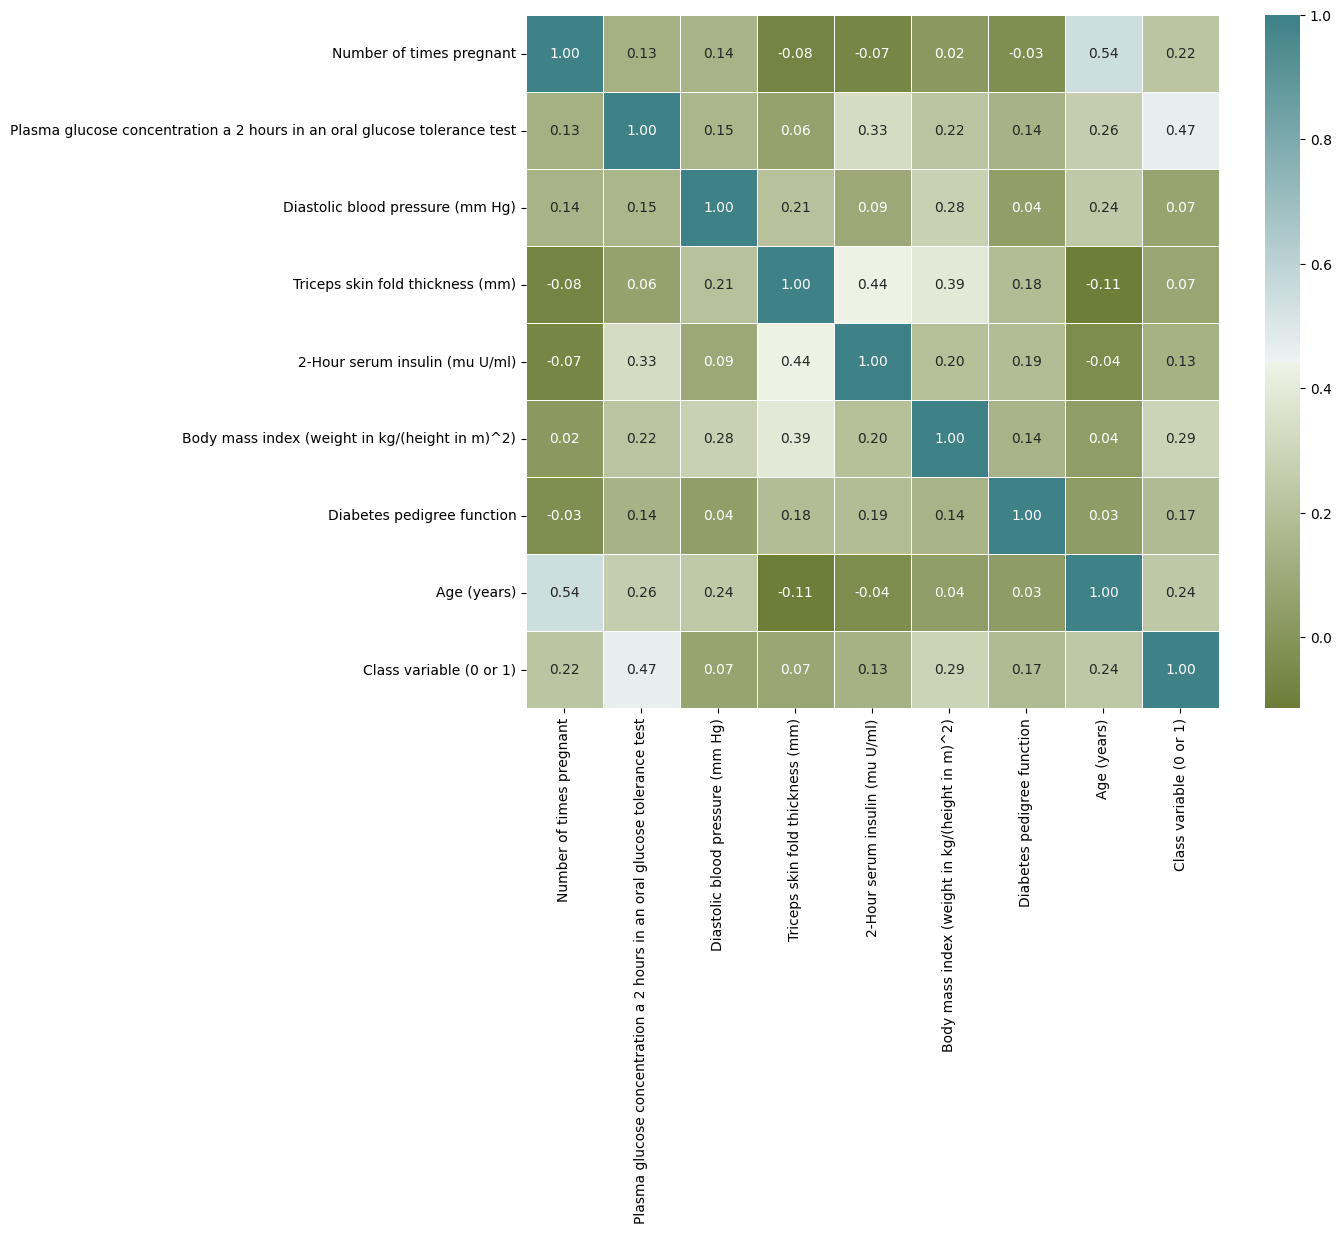

In [4]:

plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [3]:
X = data.drop('Class variable (0 or 1)', axis=1)
y = data['Class variable (0 or 1)']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
# посмотреть сбалансированность выборки
y.value_counts()
# баланс не очень

Class variable (0 or 1)
0    500
1    268
Name: count, dtype: int64

In [7]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83       417
           1       0.56      0.71      0.62       159

    accuracy                           0.76       576
   macro avg       0.72      0.75      0.73       576
weighted avg       0.79      0.76      0.77       576
               precision    recall  f1-score   support

           0       0.89      0.82      0.85       138
           1       0.62      0.74      0.67        54

    accuracy                           0.80       192
   macro avg       0.75      0.78      0.76       192
weighted avg       0.81      0.80      0.80       192



In [9]:
model = SVC(kernel='linear')
model.fit(X_train, y_train)
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       415
           1       0.56      0.71      0.63       161

    accuracy                           0.76       576
   macro avg       0.72      0.75      0.73       576
weighted avg       0.79      0.76      0.77       576
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       134
           1       0.65      0.72      0.68        58

    accuracy                           0.80       192
   macro avg       0.76      0.78      0.77       192
weighted avg       0.81      0.80      0.80       192



In [24]:
# соберу пайплайн
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(class_weight='balanced'))]) # 'balanced' для настройки весов обратно пропорционально частотам классов

In [25]:
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       345
           1       0.75      0.65      0.69       231

    accuracy                           0.77       576
   macro avg       0.77      0.75      0.76       576
weighted avg       0.77      0.77      0.77       576
               precision    recall  f1-score   support

           0       0.73      0.83      0.78       109
           1       0.73      0.59      0.65        83

    accuracy                           0.73       192
   macro avg       0.73      0.71      0.72       192
weighted avg       0.73      0.73      0.72       192



In [4]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVC(class_weight='balanced'))])

In [5]:
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       340
           1       0.82      0.69      0.75       236

    accuracy                           0.81       576
   macro avg       0.82      0.79      0.80       576
weighted avg       0.81      0.81      0.81       576
               precision    recall  f1-score   support

           0       0.74      0.80      0.77       113
           1       0.67      0.59      0.63        79

    accuracy                           0.71       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.71      0.71      0.71       192



Задача 2

In [2]:
data = pd.read_csv('bike_buyers_clean.csv')
data.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
3,24381,Single,Male,70000,0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Yes
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Marital Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   int64 
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Purchased Bike    1000 non-null   object
dtypes: int64(5), object(8)
memory usage: 101.7+ KB


In [3]:
del data['ID']

In [5]:
# проверяю, есть ли пропуски
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0] / data.shape[0]
print(f'{missing_values * 100} %')

Series([], dtype: float64) %


In [6]:
set(data['Marital Status'])

{'Married', 'Single'}

In [24]:
set(data.Education)

{'Bachelors',
 'Graduate Degree',
 'High School',
 'Partial College',
 'Partial High School'}

In [25]:
set(data.Occupation)

{'Clerical', 'Management', 'Manual', 'Professional', 'Skilled Manual'}

In [26]:
set(data['Commute Distance'])

{'0-1 Miles', '1-2 Miles', '10+ Miles', '2-5 Miles', '5-10 Miles'}

In [27]:
set(data.Region)

{'Europe', 'North America', 'Pacific'}

In [4]:
data['Marital Status']  = data['Marital Status'].apply(lambda x: 1 if x == 'Married' else 0)

In [5]:
def map_education(education):
    dct = {'Partial High School' : 5, 'High School' : 4, 'Partial College' : 3, 'Bachelors' : 2, 'Graduate Degree' : 1}
    return dct [education]
    
data['Education'] = data['Education'].apply(map_education)

In [6]:
data = data.replace(to_replace=['0-1 Miles', '1-2 Miles', '2-5 Miles', '5-10 Miles', '10+ Miles'], value=[1, 2, 3, 4, 5])

In [7]:
data = data.replace(to_replace=['No', 'Yes'], value=[0, 1])

In [8]:
def map_gender(gender):
    dct = {'Female' : 0, 'Male' : 1}
    return dct [gender]
    
data['Gender'] = data['Gender'].apply(map_gender)

In [9]:
data = pd.get_dummies(data, columns=['Occupation'], drop_first=True)

In [10]:
data = pd.get_dummies(data, columns=['Region'], drop_first=True)

<Axes: >

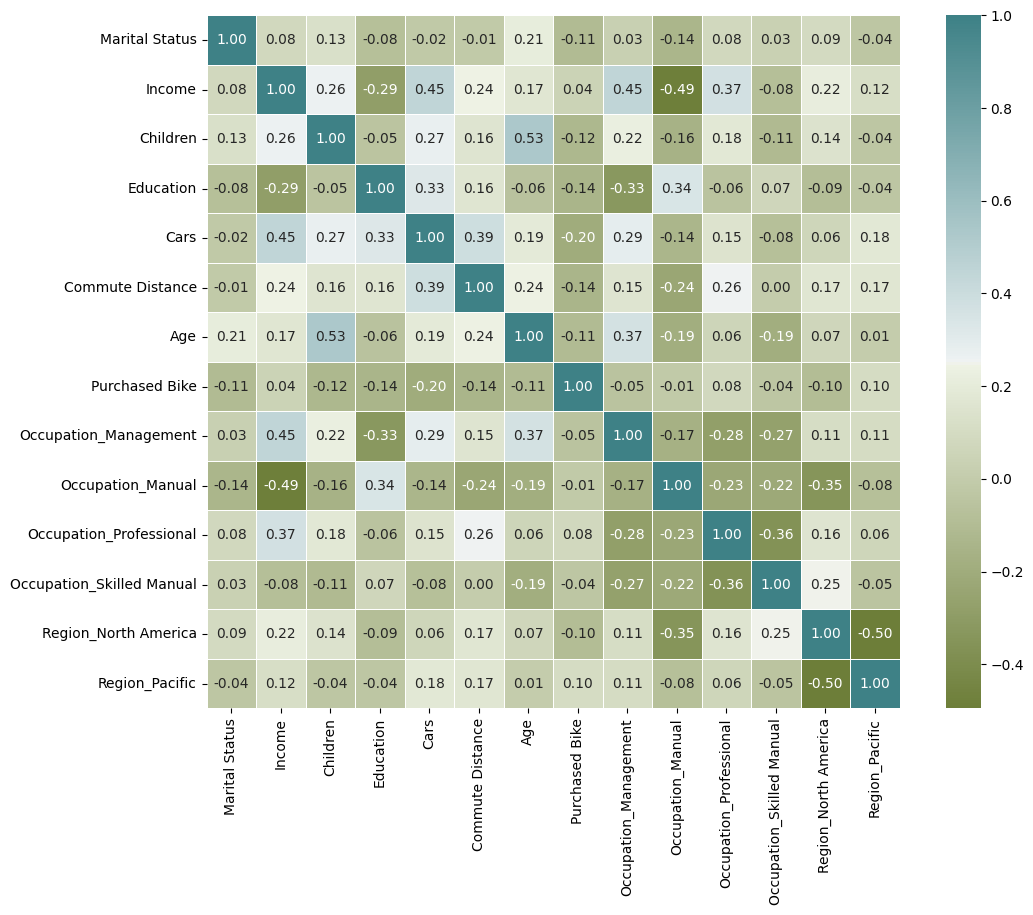

In [25]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [11]:
del data['Gender'] # можно удалить столбец с гендером, т.к. признак очень слабо коррелирует с таргетом

In [18]:
del data['Home Owner'] # удаляю, потому что слабо коррелирует с таргетом

In [19]:
X = data.drop('Purchased Bike', axis=1)
y = data['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
# смотрю сбалансированность выборки
y.value_counts()
# вполне сбалансирована

Purchased Bike
0    519
1    481
Name: count, dtype: int64

In [21]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', LogisticRegression(solver='liblinear'))])

In [22]:
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.69      0.64      0.67       414
           1       0.59      0.64      0.61       336

    accuracy                           0.64       750
   macro avg       0.64      0.64      0.64       750
weighted avg       0.64      0.64      0.64       750
               precision    recall  f1-score   support

           0       0.64      0.64      0.64       130
           1       0.61      0.61      0.61       120

    accuracy                           0.62       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.62      0.62      0.62       250



In [23]:
pipe = Pipeline([('scaler', StandardScaler()), ('model', SVC(kernel='linear'))])

In [24]:
pipe.fit(X_train, y_train)
ypred_train = pipe.predict(X_train)
ypred_test = pipe.predict(X_test)
print(classification_report(ypred_train, y_train), classification_report(ypred_test, y_test))

              precision    recall  f1-score   support

           0       0.71      0.64      0.67       430
           1       0.57      0.65      0.61       320

    accuracy                           0.64       750
   macro avg       0.64      0.64      0.64       750
weighted avg       0.65      0.64      0.65       750
               precision    recall  f1-score   support

           0       0.67      0.63      0.65       139
           1       0.57      0.61      0.59       111

    accuracy                           0.62       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.62      0.62      0.62       250

